# Project \#2 Starter Code


Name: Katja Mathesius

Problem description: For this problem we want to automate the classification of movie reviews as being either positive or negative. The dataset for this project consists of reviews sourced from IMDB that have been classified as positive or negative. To analyze this data we will utilize the deep learning technique of sentiment analysis to learn based on which words occur in a review whether a review should be classified as positive or negative. A model that performs well at this task could then be utilized to get a better idea of people's perceptions of a film, and would be especially useful in contexts where a raw numeric score isn't by default part of the film review.

Sources Used <br />
  Stack Overflow:
    - Add a word count column (muninn): https://stackoverflow.com/questions/46429033/how-do-i-count-the-total-number-of-words-in-a-pandas-dataframe-cell-and-add-thos <br />
    - Define a value outside of 1/0 to be the true/false in precision/recall scoring (Steve): https://stackoverflow.com/questions/50203106/valueerror-pos-label-1-is-not-a-valid-label-arrayneg-pos-dtype-u3 <br />
     - Disable a warning (used in the data search tool) (Garrett): https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas <br />
  Other: <br />
    - Stop truncating strings in pandas output (used in the data search tool): https://coding-stream-of-consciousness.com/2020/04/17/python-pandas-stop-truncating-strings/ <br />

# Input Pipeline (sklearn):

In [1]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/Data/CS_167_Machine_Learning/IMDB_dataset.csv')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Data Exploration:
- Number of samples
- Number of classes of the target variable
- Number of words per sample
- Distribution of sample length
- Something else: get creative :) 

------------------------------------------------------
Results: 
------------------------------------------------------
Film Data Overview: 
Number of Observations:  50000
Number of Classes:  2
Average Words per Review: 231.14594
Median Words in Reviews: 173.0
Max Words in Review:  2470
Min Words in Review:  4
Review Classification Distribution:
 positive    25000
negative    25000
Name: sentiment, dtype: int64
Distribution of Sample Length: 


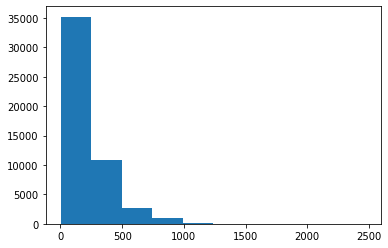

------------------------------------------------------


In [2]:
import matplotlib.pyplot as plt
## Use cells here to explore the data:

#Creates a function for the readout so it can be reused later
def data_readout(movie_data):
  print("------------------------------------------------------")
  print("Results: ")
  
  #Gets the number of samples in the movie data
  observations = movie_data.shape[0]

  #Gets the number of classifications for review type in the movie data 
  #(i.e. Gets the length of the array of unique values in the column containing the classifications)
  classifications = len(movie_data["sentiment"].unique())

  #Gets the number of words in the review and adds them to a new column
  #Credit to 'altabq' on StackOverflow: https://stackoverflow.com/questions/46429033/how-do-i-count-the-total-number-of-words-in-a-pandas-dataframe-cell-and-add-thos
  movie_data['word_count'] = movie_data.review.apply(lambda x: len(str(x).split(' ')))

  #Gets the mean, min, and max of the word count column
  avg_words = movie_data['word_count'].mean()
  median_words = movie_data['word_count'].median()
  max_words = movie_data['word_count'].max()
  min_words = movie_data['word_count'].min()
  sentiment_reviews = movie_data['sentiment'].value_counts()

  #Prints out all the data
  print("------------------------------------------------------")
  print("Film Data Overview: ")
  print("Number of Observations: ", observations)
  print("Number of Classes: ", classifications)
  print("Average Words per Review:", avg_words)
  print("Median Words in Reviews:", median_words)
  print("Max Words in Review: ", max_words)
  print("Min Words in Review: ", min_words)
  print("Review Classification Distribution:\n", sentiment_reviews)
  print("Distribution of Sample Length: ")
  plt.hist(movie_data['word_count'])
  plt.show()
  print("------------------------------------------------------")

#Creates a copy of the data
movie_data = data.copy()
data_readout(movie_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  # This is added back by InteractiveShellApp.init_path()


------------------------------------------------------
Welcome the film review data exploration interface!
Before we begin, please input the max number of results you'd like to display in a search: 
Max: 3
Please select a search mode from the following: 
Options:  ['id', 'word count', 'class', 'containing']
Mode: containing
Please input the term you want to search for: 
Term: goat
------------------------------------------------------
Results: 
------------------------------------------------------
Film Data Overview: 
Number of Observations:  111
Number of Classes:  2
Average Words per Review: 364.0900900900901
Median Words in Reviews: 287.0
Max Words in Review:  982
Min Words in Review:  41
Review Classification Distribution:
 negative    61
positive    50
Name: sentiment, dtype: int64
Distribution of Sample Length: 


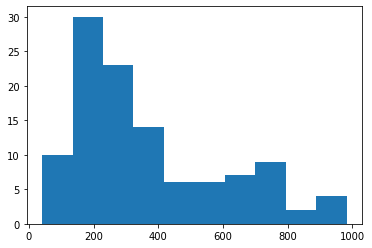

------------------------------------------------------
Raw Data: 
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [4]:
# A code block for exploring the data via different parameters, as I was curious about what the min and max word count entries looked like
options_mode = ["id", "word count", "class", "containing"]
options_count = ["=","<",">"]
options_class = ["positive","negative"]

#Creates a copy of the data and generates the word count column
movie_data = data.copy()
movie_data['word_count'] = movie_data.review.apply(lambda x: len(str(x).split(' ')))

#Removes the max value for column with for the duration of this data search tool (so the full review prints out instead of being truncated)
pd.set_option('display.max_colwidth', -1)
print("------------------------------------------------------")
print("Welcome the film review data exploration interface!")
print("Before we begin, please input the max number of results you'd like to display in a search: ")
max = int(input("Max: "))
print("Please select a search mode from the following: ")
print("Options: ", options_mode)
selection = input("Mode: ")
#Searches for the ith row of the data
if(selection == "id"):
  print("Please input the row number of the observation you'd like to retrieve: ")
  identification = int(input("Row #: "))
  subset_movie_data = movie_data.iloc[identification]
#Search for reviews with either less than, greater than or equal to a given number
elif(selection == "word count"):
  print("Please input the mode of word comparison you'd like to use: ")
  print("Options: ", options_count)
  count_selection = input("Mode: ")
  print("Please input the number of words you'd like to examine: ")
  num_words = int(input("Number: "))
  if(count_selection == "="):
    subset_movie_data = movie_data[movie_data['word_count'] == num_words]
  elif(count_selection == ">"):
    subset_movie_data = movie_data[movie_data['word_count'] > num_words]
  elif(count_selection == "<"):
    subset_movie_data = movie_data[movie_data['word_count'] < num_words]
#Search by the classification of the data
elif(selection == "class"):
  print("Please input the class you want to find entries for: ")
  print("Options: ", options_class)
  class_selection = input("Class: ")
  subset_movie_data = movie_data[movie_data['sentiment'] == class_selection]
#Search for reviews containing a given term
elif(selection == "containing"):
  print("Please input the term you want to search for: ")
  term = input("Term: ")
  subset_movie_data = movie_data[movie_data['review'].str.contains(term, case=False)]
#Disable a chained assignment warning that was falsely generated when running the data readout
pd.options.mode.chained_assignment = None
#Runs the data readout on the subset
data_readout(subset_movie_data)
#Re-enables a chained assignment warning that was falsely generated when running the data readout
pd.options.mode.chained_assignment = 'warn'
print("Raw Data: ")
print(subset_movie_data.head(max))
print("------------------------------------------------------")

#Sets the display width back to a more managable amount after running the search
pd.set_option('display.max_colwidth', 20)

## Data Preparation

I'm providing you with code that cleans the reviews by making it all lowercase letters and removing stop words. The three cells below do this for you. I still want you to explain what you did with the data here. 

In [3]:
from bs4 import BeautifulSoup
import re
import nltk
#only do next line once
nltk.download() #in Corpora tab, download stopwords
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
#The NLTK downloader will open, you need to select (d) for Download, and then 'stopwords'then (q) to quit

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Package stopwords is already up-to-date!

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [4]:
#This is a function that takes in a review, makes sure it is only lower case letters and removes stopwords.
#It returns the cleaned review text.
def clean_review(review):
    #input is a string review
    #return is review cleaned of all punctuation, lowercase, and removed nltk stopwords
    letters_only = re.sub("[^a-zA-Z]"," ",review)
    lower_case = letters_only.lower()
    words = lower_case.split()
    for stop_word in stopwords.words("english"):
        while stop_word in words:
            words.remove(stop_word)

    #Adds a check to remove the some of the common formatting codes (skipping bold -> <"strong">, because that's an actual common english word)
    HTML_terms = ["br","p","em","ol","li","ul","q"]
    for term in HTML_terms:
        while term in words:
            words.remove(term)

    cleaned = " ".join(words)
    return cleaned

In [5]:
#process the data
cleaned_text = []
for i in range(len(data)):
    cleaned_text.append(clean_review(data["review"][i]))  

In [12]:
cleaned_text[:5]

['one reviewers mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches due lack street skills 

In [6]:
#establish training and testing dataset
train_data, test_data, train_sln, test_sln = \
    train_test_split(cleaned_text, data['sentiment'], test_size = 0.2, random_state=0) 

### Vectorizing the data

**CountVectorizer**: Convert a collection of text documents to a matrix of token counts

In [9]:
from sklearn.feature_extraction.text import CountVectorizer 

#Bag of Words with 2500 most common words
vectorizer = CountVectorizer(analyzer='word', max_features = 2500)
#find the right 2500 words
vectorizer.fit(train_data)

#use the vectorizer to transform review strings into word count vectors 
train_data_vectors = vectorizer.transform(train_data).toarray()
test_data_vectors = vectorizer.transform(test_data).toarray()

In [ ]:
## Now you can use train_data_vectors and test_data_vectors to train/test/tune your sklearn models.


### Commentary:
To clean the review data there are four steps. First the punctuation from reviews is removed and replaced with spaces, and then the reviews are broken up along the spaces in order to break them down to the individual words contained within, a process called tokenization. The reviews are then searched and cleaned for stopwords and styling notation. The styling notation is functionally "garbage" values, and are created when users use italics or line breaks and so on in their reviews, thus they need to be manually cleaned out. Stopwords meanwhile are a list of common words deemed to provide no information to learning models, such as "the," "a," "an," and so on. After cleaning the styling and stop words from the reviews the reviews are divided into training and testing data. Finally they reviews are vectorized so they can be more easily used as training data. The vectorization process looks for the 5000 most commonly occuring words in the reviews, and then generates 5000 columns in which it tracks how many times the respective column's word occured in each respective row's review. With this the data cleaning process is complete and the data is ready to be used with learning algorithms.

## Metrics
What metrics will you use to evaluate your model? Why are these metrics the best for your model? (Hint, this should be more than 'accuracy').

### Commentary:

To evaluate the review classification models we will examine accuracy, as well as precision and recall scores. Accuracy will give us a baseline idea of how "correct" each model is, meanwhile precision and recall will give us an idea on if the model is biased towards classifying things a certain way. We'll also supplement precision and recall with a confusion matrix as that provides a visualization of the information contained within those values.

## Model Planning and Execution

Identify which learning algorithms you will try and which important parameters you will tune for each one.

For this task we will try using Support Vector Classifiers, Perceptrons, and Multi-Layer Perceptrons to attempt to classify the reviews:

- Support Vector Classifiers important paramaters are the regularization parameter (C), the algorithm's kernel type (kernel), and the parameters polynomial degree (degree) and kernel coefficient (gamma) whose relevancy is dependent upon the kernel type.

- Perceptrons important parameters are the regularization term (penalty), and the constant multiplier for penalty (alpha).

- MLP's important parameters are the width of hidden layers (hidden_layer_sizes), the activation function for hidden layers (activation), the weight optimization solver (solver), the regularization term (alpha), and several other parameters including batch size and learning rate whose relevancy is dependant on the activation function.

We will also use Principal Component Analysis to preprocess the data in hopes of improving the before mentioned models. PCA is an unsupervised learning algorithm and feature extraction technique that is capable of reducing dimensionality of data while also increasing information gain by searching for composite features (otherwise known as principle components) that are made up of multiple original features but better explain the trends in the target than the original features could independently. The primary parameter of concern for PCA is n_components, which dictates how many components PCA should keep. This can be set to an integer value to get the n-most helpful composite values PCA can generate, or a decimal between 0 and 1 to the number of values needed to explain n% of the variance.

In [7]:
## Imports
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

import matplotlib.pyplot as plt

In [10]:
#Sets the extractor to find components enough to explain 90% of variance
extractor = PCA(n_components = .9, whiten=True)
extractor.fit(train_data_vectors)

train_transformed = extractor.transform(train_data_vectors)
test_transformed = extractor.transform(test_data_vectors)

print(extractor.explained_variance_ratio_)

[0.06011777 0.04680889 0.01931148 ... 0.0001436  0.00014354 0.00014336]


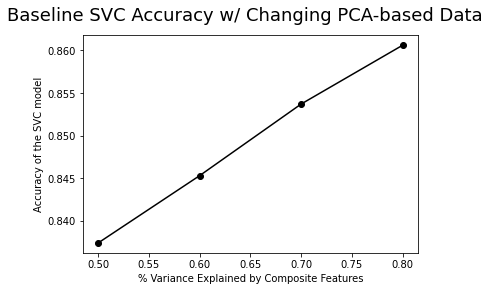

In [11]:
accuracy_scores = []
features_tracker = []

target_percent = .5
weights_sum = 0
tracker = 0
for weight in extractor.explained_variance_ratio_:
      weights_sum += weight
      tracker += 1
      if weights_sum > (target_percent):
        break

base_svc = SVC(random_state = 8)
base_svc.fit(train_transformed[:,:tracker],train_sln)
SVC_predictions = base_svc.predict(test_transformed[:,:tracker])

accuracy_scores.append(accuracy_score(test_sln, SVC_predictions))
features_tracker.append(target_percent)

target_percent = .6
weights_sum = 0
tracker = 0
for weight in extractor.explained_variance_ratio_:
      weights_sum += weight
      tracker += 1
      if weights_sum > (target_percent):
        break

base_svc = SVC(random_state = 8)
base_svc.fit(train_transformed[:,:tracker],train_sln)
SVC_predictions = base_svc.predict(test_transformed[:,:tracker])

accuracy_scores.append(accuracy_score(test_sln, SVC_predictions))
features_tracker.append(target_percent)

target_percent = .7
weights_sum = 0
tracker = 0
for weight in extractor.explained_variance_ratio_:
      weights_sum += weight
      tracker += 1
      if weights_sum > (target_percent):
        break

base_svc = SVC(random_state = 8)
base_svc.fit(train_transformed[:,:tracker],train_sln)
SVC_predictions = base_svc.predict(test_transformed[:,:tracker])

accuracy_scores.append(accuracy_score(test_sln, SVC_predictions))
features_tracker.append(target_percent)

target_percent = .8
weights_sum = 0
tracker = 0
for weight in extractor.explained_variance_ratio_:
      weights_sum += weight
      tracker += 1
      if weights_sum > (target_percent):
        break

base_svc = SVC(random_state = 8)
base_svc.fit(train_transformed[:,:tracker],train_sln)
SVC_predictions = base_svc.predict(test_transformed[:,:tracker])

accuracy_scores.append(accuracy_score(test_sln, SVC_predictions))
features_tracker.append(target_percent)

#Creates the a plot of the accuracy vs the percentage of variance explained by the features utilized
plt.plot(features_tracker,accuracy_scores,("ko-"))

#Defines the title for the plot
plt.suptitle('Baseline SVC Accuracy w/ Changing PCA-based Data',fontsize=18)
#Defines the x-axis label for the plot
plt.xlabel('% Variance Explained by Composite Features')
#Defines the y-axis label for the plot
plt.ylabel('Accuracy of the SVC model')

#Shows the plot
plt.show()

#### Commentary
As we can see from this plot, increasing the % of variance explained by composite features does, as one would assume, lead to an increase in accuracy of a baseline SVC model. However it should also be noted that this increase was not a large one. The accuracy only increased from just shy of 84% accuracy up to just over 86%. For some purposes this extra 2% of accuracy might be crucial, however in our case we can accept the tradeoff of slightly lower baseline accuracy in favor of using substantially less data. In fact based on the trend we've seen here, moving forward I personally feel comfortable using an even lower 40% variance explained cutoff, just to speed up the runtime.

In [12]:
#Sets the extractor to find components enough to explain 40% of variance
extractor = PCA(n_components = .4, whiten=True)
extractor.fit(train_data_vectors)

train_transformed = extractor.transform(train_data_vectors)
test_transformed = extractor.transform(test_data_vectors)

In [16]:
accuracy_scores = []
recall_scores = []
precision_scores = []

#Initializes an SVC model with a sigmoid kernel
sigmoid_svc = SVC(kernel = "sigmoid", random_state = 8)

sigmoid_svc.fit(train_transformed,train_sln)
sigmoid_predictions = sigmoid_svc.predict(test_transformed)

accuracy_scores.append(accuracy_score(test_sln, sigmoid_predictions))
recall_scores.append(recall_score(test_sln, sigmoid_predictions,pos_label="positive"))
precision_scores.append(precision_score(test_sln, sigmoid_predictions,pos_label="positive"))

#Initializes an SVC model with a rbf kernel
rbf_svc = SVC(kernel = "rbf", random_state = 8)

rbf_svc.fit(train_transformed,train_sln)
rbf_predictions = rbf_svc.predict(test_transformed)

accuracy_scores.append(accuracy_score(test_sln, rbf_predictions))
recall_scores.append(recall_score(test_sln, rbf_predictions,pos_label="positive"))
precision_scores.append(precision_score(test_sln, rbf_predictions,pos_label="positive"))

#Initializes an SVC model with a poly kernel
poly_svc = SVC(kernel = "poly", random_state = 8)

poly_svc.fit(train_transformed,train_sln)
poly_predictions = poly_svc.predict(test_transformed)

accuracy_scores.append(accuracy_score(test_sln, poly_predictions))
recall_scores.append(recall_score(test_sln, poly_predictions,pos_label="positive"))
precision_scores.append(precision_score(test_sln, poly_predictions,pos_label="positive"))

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Prints the relevant results of the models
print("\nSVC w/ Sigmoid Kernel:")
print("Classification Report: ")
print(classification_report(test_sln, sigmoid_predictions))
print("Confusion Matrix: ")
print(confusion_matrix(test_sln, sigmoid_predictions))

print("\nSVC w/ rbf Kernel:")
print("Classification Report: ")
print(classification_report(test_sln, rbf_predictions))
print("Confusion Matrix: ")
print(confusion_matrix(test_sln, rbf_predictions))

print("\nSVC w/ Polynomial Kernel:")
print("Classification Report: ")
print(classification_report(test_sln, poly_predictions))
print("Confusion Matrix: ")
print(confusion_matrix(test_sln, poly_predictions))


SVC w/ Sigmoid Kernel:
Classification Report: 
              precision    recall  f1-score   support

    negative       0.75      0.75      0.75      5035
    positive       0.75      0.75      0.75      4965

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

Confusion Matrix: 
[[3784 1251]
 [1244 3721]]

SVC w/ rbf Kernel:
Classification Report: 
              precision    recall  f1-score   support

    negative       0.82      0.78      0.80      5035
    positive       0.79      0.83      0.81      4965

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000

Confusion Matrix: 
[[3928 1107]
 [ 862 4103]]

SVC w/ Polynomial Kernel:
Classification Report: 
              precision    recall  f1-score   support

    negative       0.82      0.76      0.79      5035
  

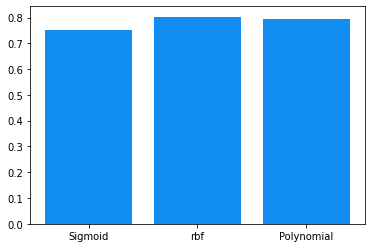

In [31]:
kernels = ["Sigmoid","rbf","Polynomial"]

x_axis = np.arange(len(kernels))

# Creates a multibar chart with bars for recall and precision
plt.bar(x_axis, accuracy_scores, label = 'Accuracy', color='#118df2')

# Set the X-ticks to be the kernels
plt.xticks(x_axis, kernels)

#Display the plot
plt.show()

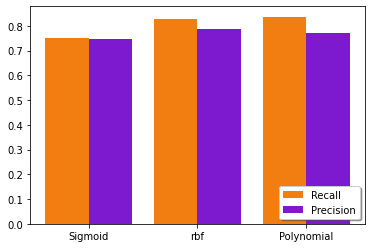

In [32]:
import numpy as np

kernels = ["Sigmoid","rbf","Polynomial"]

x_axis = np.arange(len(kernels))

# Creates a multibar chart with bars for recall and precision
plt.bar(x_axis -0.2, recall_scores, width=0.4, label = 'Recall', color='#f27e11')
plt.bar(x_axis +0.2, precision_scores, width=0.4, label = 'Precision', color='#7d19cf')

# Set the X-ticks to be the kernels
plt.xticks(x_axis, kernels)

#Display the plot
plt.legend(loc='lower right', shadow=True)
plt.show()

In [38]:
accuracy_scores = []
recall_scores = []
precision_scores = []

#Initalizes a perceptron model with no penalty
none_perc = Perceptron(penalty="none", random_state = 8)
none_perc.fit(train_transformed,train_sln)
none_predictions = none_perc.predict(test_transformed)

accuracy_scores.append(accuracy_score(test_sln, none_predictions))
recall_scores.append(recall_score(test_sln, none_predictions,pos_label="positive"))
precision_scores.append(precision_score(test_sln, none_predictions,pos_label="positive"))

#Initalizes a perceptron model with l1 penalty
l1_perc = Perceptron(penalty="l1", random_state = 8)
l1_perc.fit(train_transformed,train_sln)
l1_predictions = l1_perc.predict(test_transformed)

accuracy_scores.append(accuracy_score(test_sln, l1_predictions))
recall_scores.append(recall_score(test_sln, l1_predictions,pos_label="positive"))
precision_scores.append(precision_score(test_sln, l1_predictions,pos_label="positive"))

#Initalizes a perceptron model with l2 penalty
l2_perc = Perceptron(penalty="l2", random_state = 8)
l2_perc.fit(train_transformed,train_sln)
l2_predictions = l2_perc.predict(test_transformed)

accuracy_scores.append(accuracy_score(test_sln, l2_predictions))
recall_scores.append(recall_score(test_sln, l2_predictions,pos_label="positive"))
precision_scores.append(precision_score(test_sln, l2_predictions,pos_label="positive"))

#Initalizes a perceptron model with l2 penalty + an alpha
l2_mod_perc = Perceptron(penalty="l2", alpha = 0.001, random_state = 8)
l2_mod_perc.fit(train_transformed,train_sln)
l2_mod_predictions = l2_mod_perc.predict(test_transformed)

accuracy_scores.append(accuracy_score(test_sln, l2_mod_predictions))
recall_scores.append(recall_score(test_sln, l2_mod_predictions,pos_label="positive"))
precision_scores.append(precision_score(test_sln, l2_mod_predictions,pos_label="positive"))

In [39]:
#Prints the relevant results of the models
print("\nPerceptron w/ no regularization term:")
print("Classification Report: ")
print(classification_report(test_sln, none_predictions))
print("Confusion Matrix: ")
print(confusion_matrix(test_sln, none_predictions))

print("\nPerceptron w/ l1 regularization term:")
print("Classification Report: ")
print(classification_report(test_sln, l1_predictions))
print("Confusion Matrix: ")
print(confusion_matrix(test_sln, l1_predictions))

print("\nPerceptron w/ l2 regularization term:")
print("Classification Report: ")
print(classification_report(test_sln, l2_predictions))
print("Confusion Matrix: ")
print(confusion_matrix(test_sln, l2_predictions))

print("\nPerceptron w/ l2 regularization term and a modified alpha:")
print("Classification Report: ")
print(classification_report(test_sln, l2_mod_predictions))
print("Confusion Matrix: ")
print(confusion_matrix(test_sln, l2_mod_predictions))


Perceptron w/ no regularization term:
Classification Report: 
              precision    recall  f1-score   support

    negative       0.73      0.77      0.75      5035
    positive       0.75      0.70      0.73      4965

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000

Confusion Matrix: 
[[3874 1161]
 [1467 3498]]

Perceptron w/ l1 regularization term:
Classification Report: 
              precision    recall  f1-score   support

    negative       0.72      0.72      0.72      5035
    positive       0.72      0.71      0.72      4965

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000

Confusion Matrix: 
[[3634 1401]
 [1421 3544]]

Perceptron w/ l2 regularization term:
Classification Report: 
              precision    recall  f1-score   support

    negati

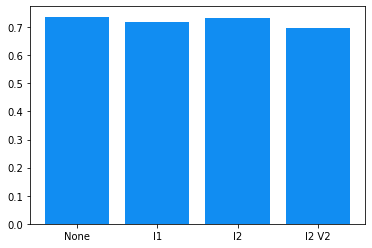

In [43]:
penalty = ["None","l1","l2","l2 V2"]

x_axis = np.arange(len(penalty))

# Creates a multibar chart with bars for recall and precision
plt.bar(x_axis, accuracy_scores, label = 'Accuracy', color='#118df2')

# Set the X-ticks to be the kernels
plt.xticks(x_axis, penalty)

#Display the plot
plt.show()

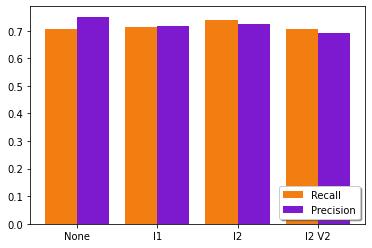

In [44]:
penalty = ["None","l1","l2","l2 V2"]

x_axis = np.arange(len(penalty))

# Creates a multibar chart with bars for recall and precision
plt.bar(x_axis -0.2, recall_scores, width=0.4, label = 'Recall', color='#f27e11')
plt.bar(x_axis +0.2, precision_scores, width=0.4, label = 'Precision', color='#7d19cf')

# Set the X-ticks to be the kernels
plt.xticks(x_axis, penalty)

#Display the plot
plt.legend(loc='lower right', shadow=True)
plt.show()

In [46]:
accuracy_scores = []
recall_scores = []
precision_scores = []

#Initalizes a perceptron model with a relu activation function
relu_mlp = MLPClassifier(activation="relu", max_iter=500, random_state = 8)
relu_mlp.fit(train_transformed,train_sln)
relu_predictions = relu_mlp.predict(test_transformed)

accuracy_scores.append(accuracy_score(test_sln, relu_predictions))
recall_scores.append(recall_score(test_sln, relu_predictions,pos_label="positive"))
precision_scores.append(precision_score(test_sln, relu_predictions,pos_label="positive"))

#Initalizes a perceptron model with a tanh activation function
tanh_mlp = MLPClassifier(activation="tanh", max_iter=500, random_state = 8)
tanh_mlp.fit(train_transformed,train_sln)
tanh_predictions = tanh_mlp.predict(test_transformed)

accuracy_scores.append(accuracy_score(test_sln, tanh_predictions))
recall_scores.append(recall_score(test_sln, tanh_predictions,pos_label="positive"))
precision_scores.append(precision_score(test_sln, tanh_predictions,pos_label="positive"))

#Initalizes a perceptron model with a logistic activation function
logistic_mlp = MLPClassifier(activation="logistic", max_iter=500, random_state = 8)
logistic_mlp.fit(train_transformed,train_sln)
logistic_predictions = logistic_mlp.predict(test_transformed)

accuracy_scores.append(accuracy_score(test_sln, logistic_predictions))
recall_scores.append(recall_score(test_sln, logistic_predictions,pos_label="positive"))
precision_scores.append(precision_score(test_sln, logistic_predictions,pos_label="positive"))


#Initalizes a perceptron model with an identity activation function
identity_mlp = MLPClassifier(activation="identity", max_iter=500, random_state = 8)
identity_mlp.fit(train_transformed,train_sln)
identity_predictions = identity_mlp.predict(test_transformed)

accuracy_scores.append(accuracy_score(test_sln, identity_predictions))
recall_scores.append(recall_score(test_sln, identity_predictions,pos_label="positive"))
precision_scores.append(precision_score(test_sln, identity_predictions,pos_label="positive"))

#Initalizes a perceptron model with a relu activation function and an lbfgs solver
relu_lbfgs_mlp = MLPClassifier(activation="relu", solver="lbfgs", max_iter=500, random_state = 8)
relu_lbfgs_mlp.fit(train_transformed,train_sln)
relu_lbfgs_predictions = relu_lbfgs_mlp.predict(test_transformed)

accuracy_scores.append(accuracy_score(test_sln, relu_lbfgs_predictions))
recall_scores.append(recall_score(test_sln, relu_lbfgs_predictions,pos_label="positive"))
precision_scores.append(precision_score(test_sln, relu_lbfgs_predictions,pos_label="positive"))

#Initalizes a perceptron model with a relu activation function and a low number of neurons in hidden layers
relu_small_layers_mlp = MLPClassifier(activation="relu", hidden_layer_sizes=50, max_iter=500, random_state = 8)
relu_small_layers_mlp.fit(train_transformed,train_sln)
relu_small_layers_predictions = relu_small_layers_mlp.predict(test_transformed)

accuracy_scores.append(accuracy_score(test_sln, relu_small_layers_predictions))
recall_scores.append(recall_score(test_sln, relu_small_layers_predictions,pos_label="positive"))
precision_scores.append(precision_score(test_sln, relu_small_layers_predictions,pos_label="positive"))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [50]:
#Prints the relevant results of the models
print("\nMLP w/ Relu Activation:")
print("Classification Report: ")
print(classification_report(test_sln, relu_predictions))
print("Confusion Matrix: ")
print(confusion_matrix(test_sln, relu_predictions))

print("\nMLP w/ Tanh Activation:")
print("Classification Report: ")
print(classification_report(test_sln, tanh_predictions))
print("Confusion Matrix: ")
print(confusion_matrix(test_sln, tanh_predictions))

print("\nMLP w/ Logistic Activation:")
print("Classification Report: ")
print(classification_report(test_sln, logistic_predictions))
print("Confusion Matrix: ")
print(confusion_matrix(test_sln, logistic_predictions))

print("\nMLP w/ Identity Activation:")
print("Classification Report: ")
print(classification_report(test_sln, identity_predictions))
print("Confusion Matrix: ")
print(confusion_matrix(test_sln, identity_predictions))

print("\nMLP w/ Relu Activation and lbfgs Solver:")
print("Classification Report: ")
print(classification_report(test_sln, relu_lbfgs_predictions))
print("Confusion Matrix: ")
print(confusion_matrix(test_sln, relu_lbfgs_predictions))

print("\nMLP w/ Relu Activation and smaller width:")
print("Classification Report: ")
print(classification_report(test_sln, relu_small_layers_predictions))
print("Confusion Matrix: ")
print(confusion_matrix(test_sln, relu_small_layers_predictions))


MLP w/ Relu Activation:
Classification Report: 
              precision    recall  f1-score   support

    negative       0.75      0.77      0.76      5035
    positive       0.76      0.74      0.75      4965

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000

Confusion Matrix: 
[[3869 1166]
 [1269 3696]]

MLP w/ Tanh Activation:
Classification Report: 
              precision    recall  f1-score   support

    negative       0.74      0.73      0.73      5035
    positive       0.73      0.74      0.74      4965

    accuracy                           0.73     10000
   macro avg       0.74      0.74      0.73     10000
weighted avg       0.74      0.73      0.73     10000

Confusion Matrix: 
[[3666 1369]
 [1281 3684]]

MLP w/ Logistic Activation:
Classification Report: 
              precision    recall  f1-score   support

    negative       0.75      0.74      0.74     

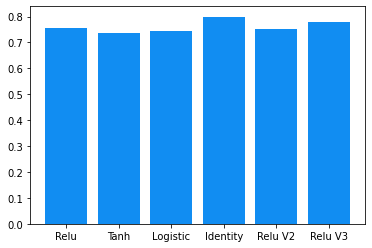

In [48]:
versions = ["Relu","Tanh","Logistic","Identity","Relu V2","Relu V3"]

x_axis = np.arange(len(versions))

# Creates a multibar chart with bars for recall and precision
plt.bar(x_axis, accuracy_scores, label = 'Accuracy', color='#118df2')

# Set the X-ticks to be the kernels
plt.xticks(x_axis, versions)

#Display the plot
plt.show()

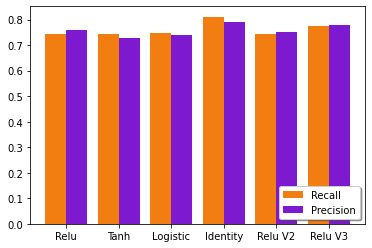

In [49]:
versions = ["Relu","Tanh","Logistic","Identity","Relu V2","Relu V3"]

x_axis = np.arange(len(versions))

# Creates a multibar chart with bars for recall and precision
plt.bar(x_axis -0.2, recall_scores, width=0.4, label = 'Recall', color='#f27e11')
plt.bar(x_axis +0.2, precision_scores, width=0.4, label = 'Precision', color='#7d19cf')

# Set the X-ticks to be the kernels
plt.xticks(x_axis, versions)

#Display the plot
plt.legend(loc='lower right', shadow=True)
plt.show()

## Bumps in the Road

What challenges did you encounter? How did you overcome these challenges? Did you have to adapt your strategy to account for these challenges? Why or why not?

The biggest challenge by far with this project has been simply the length of runtime for the models. To address this I needed to make sacrifices to the amount of data I was willing to take into the models and quantity of experiments I was willing to run to make decisions about the optimal models. In a perfect world we would be able to use all the data and test many different models before coming to a conclusion. However with the constraint of compute resources and time, as data scientists we need to be able to make choices about where to we can afford to make sacrifices. In this project that meant cutting way back on the quantity of data I was using in my models, which is the motivation of using PCA in general so ideally not too much was lost in practice there. Additionally I had to run less trials than I'd ideally like, while also ensuring I wasn't running so few trials that I wasn't gathering enough performance analytics. This was a difficult decision, however I did my best to make calls and strike a balance between the two extremes.

## Results

After you conduct your learning experiment, summarize the results you got. Include visualizations as appropriate.

Examining the results, the best performing model in terms of accuracy was a three way tie between the SVC model with an rbf kernel, the SVC model with a polynomial kernel, and the MLP model with an identity activation function. Each of these had an 80% accuracy score, which isn't amazing but given the fact they were given a pretty condensed and limited version of the data to work with its still fairly impressive. 

Additionally while not the best performing, it was interesting when looking at the accuracy bar charts to notice that the MLP with relu activation did better in the version with reduced width, demonstrating clearly that more computational analysis does not always mean better results.

Looking at the bar charts for recall and precision we can see for the most part these models have similar recall and precision scores, which would make sense as the data didn't have a bias to begin with towards either categorization.

Finally as already discussed  the increasing the variance explained requirement for PCA did unsurprisingly increase accuracy of baseline models. While our 80% accuracy now might not be amazing, the baseline test (which by coincidence used what turned out to be one of the best models), was able to achieve a little over 86% accuracy when given more PCA-extracted data to work with. This indicates that even in the worst case that no more tweaking could improve these three models, we can still actually achieve at minimum an 86% accuracy in movie review prediction.

## Conclusions

What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

The best performing models was a three way tie between the SVC model with an rbf kernel, the SVC model with a polynomial kernel, and the MLP model with an identity activation function. I was especially impressed the identity activation function mlp came out in the top. Based on the documentation it seemed less generally useful than the other activation functions, so I almost skipped that one entirely to save on resources. None of the models did terribly, although it could be noted that some of the MLP models (I believe the ones with relu activation functions) didn't converge even when I extended the normal max iteration count of 200 up to 500.

If I were to continue experimenting I'd likely keep working with the MLP model with the identity activation function. Changing the hidden_layer_sizes with the relu activation function improved that model's performance so it could be the case that the identity function might also benefit from this change. Though this is just a theory.

It was also interesting that all of the perceptrons performed pretty badly. Its not necessarily surprising given the complexity of the task, in fact relative to the complexity they actually performed fairly well. However when compared to the other models none of them were competitive.

Overall however, even without further refinement, an 86% accuracy rate on movie review sentiment seems like a decent success rate. While 86% is not good enough for many real world applications, at least not without oversight, I would probably be comfortable utilizing one of the models created here to quickly bulk analyze film reviews. 

